# Worksheet 12

Name:  Hasan Mustafabayli
UID: U15717216

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes - students can be classified into 2 classes (those who got the offer and those who didn't)
2. No - we cannot classify the number of months as they are not discrete
3. Yes - in correlation with 1-5 stars rating we can classify reviews into 5 classes
4. No - as it encapsulates predicting a continious numerical value

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

1. Split the data into training data and testing data - while a certain percentage of data is assigned to the training set, the remaining is assigned to to the testing set.
2. Use the training set to make your model learn.
3. Use the testing set to see how good the performance of your trained model is - this allows us to understand how well the model is going to perform with unseen data. 

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting means that we have a simplistic model that does not capture all the underlying patterns in the data. In other words, the model is unable to learn from the training and the test data. Signs to look out for involve the performance of the model is bad on the same level on both training and test data and the use of additional features improve the performance by a lot. 

Overfitting - occurs when a model learns the training data too well instead of the general underlying pattern. Although it performs well with the training data, it is unable to generalize the new data. Signs to look out for include exceptionally high performance on the training data, a significant drop in performance on the test or validation data compared to the training data.

### K Nearest Neighbors

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

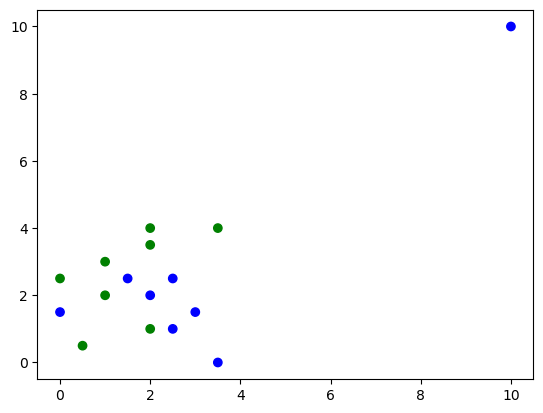

In [9]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

In [10]:
outlier = [i for i, (a, b) in enumerate(zip(data["Attribute A"], data["Attribute B"])) if a == b == 10]

if outlier:
    for x in data.keys():
        data[x].pop(outlier[0])

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

The point at 3.5, 0 seems as if it is noise becuase we expect the trend of the data to be positive.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

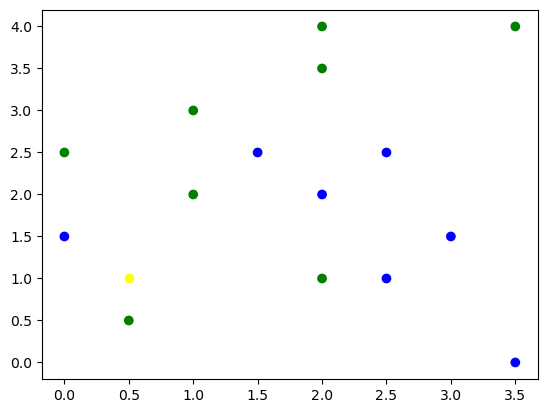

In [11]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.scatter(0.5, 1, color="yellow")
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

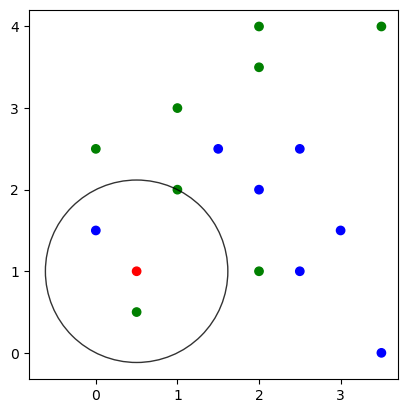

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def n_closest_to(example, n):
    # Calculate distances
    distances = []
    for i in range(len(data["Attribute A"])):
        point = np.array([data["Attribute A"][i], data["Attribute B"][i]])
        distances.append(np.linalg.norm(point - np.array(example)))
    
    # Get indices of n closest points
    sorted_indices = np.argsort(distances)
    return sorted_indices[:n]

location = (0.5, 1)

# Get the index of the farthest among the n closest points
index = n_closest_to(location, 3)[-1]

# Calculate the radius based on the distance to the farthest point among the n closest
radius = np.linalg.norm(np.array([data["Attribute A"][index], data["Attribute B"][index]]) - np.array(location))

_, axes = plt.subplots()

# Plot the scatter points with colors based on class
axes.scatter(data["Attribute A"] + [0.5], data["Attribute B"] + [1], color=colors[data["Class"] + [2]].tolist())

# Plot the circle
cir = plt.Circle(location, radius, fill=False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal')  # Ensures circle is not distorted
plt.show()



f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [15]:
def majority(points):
    votes = []
    for pt in points:
        votes.append(data["Class"][pt])
    
    # Using set to get unique class labels
    unique_votes = set(votes)
    
    # Finding the class label with the highest frequency
    best_class = None
    max_count = -1
    for uv in unique_votes:
        if votes.count(uv) > max_count:
            best_class = uv
            max_count = votes.count(uv)
    
    return best_class

relevant_points = n_closest_to(location, 3)
inferred_class = majority(relevant_points)
print(f"Deduced Class: {inferred_class}")


Deduced Class: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [20]:
count = 0
for i in range(len(data["Attribute A"])):
    actual_class = (data["Attribute A"][i], data["Attribute B"][i])
    training_set = n_closest_to(location, 3)
    prediction = majority(training_set)
    if prediction == data["Class"][i]:
        count += 1
y = count / len(data["Attribute A"])

print(f"overall accuracy = {y}")

overall accuracy = 0.5333333333333333
